# MSDS 432, Assignment 4 - Quick Sort

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

### Person Type

In [5]:
class Person:
    
    def __init__(self, first_name, last_name, address):
        """Initialize a new Person object."""
        self._fname = first_name
        self._lname = last_name
        self._address = address
        
    def first_name(self):
        return self._fname
    
    def last_name(self):
        return self._lname
    
    def address(self):
        return self._address
    
    def __str__(self):
        return self._lname + ", " + self._fname + " : " + self._address
    
    def to_dict(self):
        return {
            'address' : self._address,
            'first_name' : self._fname,
            'last_name' : self._lname
        }

## Sorting Algorithms

In [6]:
def quickSort(array):
    """Quicksort, uses divide and conquer strategy to sort an array, O(n log n)"""
    if len(array) < 2:
        # base case, arrays with 0 or 1 elements are already sorted.
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all elements greather than the pivot
        greater = [i for i in array[1:] if i >= pivot]
        return quickSort(less) + [pivot] + quickSort(greater)

def insertionSort(arr):
    """Insertion Sort Algorithm, O(N**2)"""

    for i in range(len(arr)):
        j = i
        while j > 0 and (arr[j] <arr[j-1]):
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j = j - 1
    return arr

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

def sort_df(df, column_idx, key):
    """Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function"""
    
    col = df.ix[:,column_idx]
    temp = np.array(col.values.tolist())
    order = sorted(range(len(temp)), key=lambda j: key(temp[j]))
    return df.ix[order]

def sort_pd(key=None,reverse=False,cmp=None):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse,cmp=cmp)]
    return sorter

### Sample Data

In [7]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
characters = [chr(i) for i in range(97,123)]

def gen_code():
    return ''.join([characters[int(np.random.uniform(0, 26))] for k in range(0, 10)])

people = []

for index in range(0, 50):
    state_index = int(np.random.uniform(0, 50 - index)) # randomly select a state from the list.
    state = states[state_index] # save the value.
    states.remove(state) # remove it from possible selections to avoid duplication.
    
    people.append(Person(gen_code(), gen_code(), state)) # add it to our list of people.

df_people = pd.DataFrame.from_records([p.to_dict() for p in people]) # convert our model of people into a pandas dataframe.

In [8]:
df_people # show the dataframe of people.

,address,first_name,last_name
0,WI,cxwzpzqdyx,fcjfvrcdlz
1,RI,uftmachbov,vmfpqqeodu
2,ND,lmvioglbcp,utahbpplri
3,AR,igcdhrbfze,dvrlkuxpel
4,PA,ytdbgaxney,cktzcomumw
5,CT,cjqhwxjtdm,caomivgmmx
6,TN,kvrbggcakm,xctcesictk
7,NV,jxldwsdxzt,oterlntowb
8,NJ,brvgfmtfvq,pdrhovgxpa
9,WA,tkmnnzocoe,zejzxyrapv


## Benchmark

In [9]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Quick Sort', 'Insertion Sort', 'Default Sort'])

iters = 100

# Benchmark Sorting routines, take average of 100 calls.
qs_time = profile(lambda: [ df_people.copy().apply(quickSort, 0) for k in range(0, iters)]) / iters
is_time = profile(lambda: [ df_people.copy().apply(insertionSort, 0) for k in range(0, iters)]) / iters
ds_time = is_time = profile(lambda: [ df_people.copy().sort_values(by = ['first_name', 'last_name', 'address']) for k in range(0, iters)]) / iters

results.loc[0] = [qs_time, is_time, ds_time]

## Results

In [10]:
results # display the results table / DataFrame

,Quick Sort,Insertion Sort,Default Sort
0,0.001421,0.00104,0.00104


## Summary

The three sorting algorithms compared in this lab are quick sort, insertion sort and Pandas built-in sorting algorithm which is a hybrid derived from insertion sort and merge sort. The three algorithms have relatively similar run-time behavior in a simulation environment, even though two of the algorithms under study, quick sort and insertion sort, have the same asymptotic complexity (n²).

Insertion sort works by examining each element in the array, and repeatedly attempts to swap it with the previous element if the ‘cursor’ element is smaller than the one it’s being compared to. The “Big-O” runtime analysis of this algorithms is n² due to the algorithm having to compare n elements against n elements; even though the actual number of comparisons could be reduced drastically if the input array was already sorted. We must assume the worst case for this analysis, and that leads us to O(n²).
Quick sort uses a completely different algorithmic strategy for performing its sorting function, namely the divide and conquer strategy.

Quick sort starts off by picking a “pivot” element, in this instance it’s the first value it sees. Once the pivot element is chosen, the elements are divided into two subsets, one comprised of elements smaller than the pivot, and one greater than the pivot, then quick sort is called again wrapped around the pivot value. The recursive nature of this algorithm leads to both an efficient and readable algorithm.

The sorting method that’s default in Pandas has the same run-time performance in this lab as insertion sort. In the lab, we ensure that in each iteration of the benchmark the randomly shuffled dataframe is coped, then sorted, so that successive calls to insertion sort won’t skew the results, i.e., if we sorted the dataframe once in place and insertion sort was called on a presorted copy, it would always execute in best-case runtime, O(n).

All these approaches to sorting are both valid and useful for any data engineer to know. For example, as mentioned with insertion sort, if the engineer is confident that the list will be close to fully sorted naturally before calling a sort routine, then one should prefer the insertion method over the selection method, as the run-time will be drastically faster. However, as we see extremely clear in this example, when there is an implementation of a common algorithm available in the base libraries of the language, it’s often best to defer to the out of the box implementations instead of rolling your own unless you have extremely clear requirements on why you should do so.

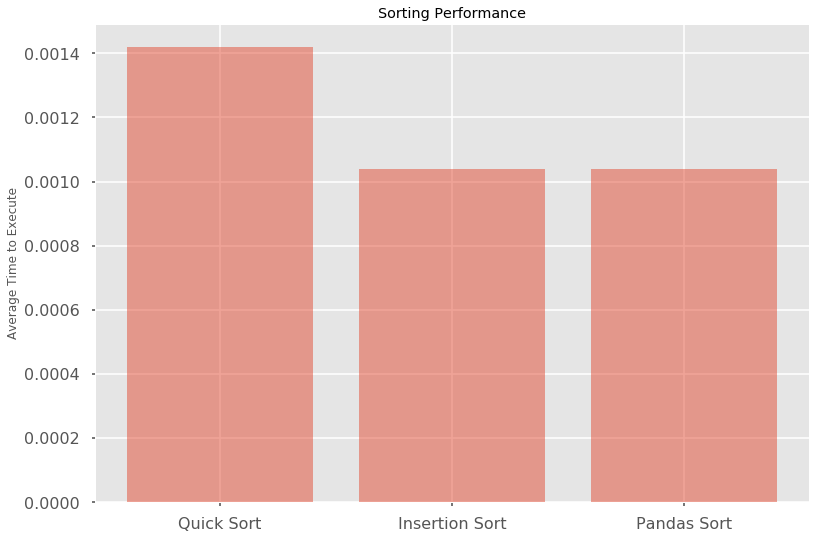

In [11]:
sorters = ('Quick Sort', 'Insertion Sort', 'Pandas Sort')
y_pos = np.arange(len(sorters))
performance = [qs_time, is_time, ds_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, sorters)
plt.ylabel('Average Time to Execute')
plt.title('Sorting Performance')

plt.show()